<div style="float:left;font-size:20px;">
    <h1>Interpolation PCA</h1>
</div><div style="float:right;"><img src="../../assets/banner.jpg"></div>

<hr>

In [2]:
import sys
sys.path.insert(0, r"R:\Projects\catana")
from catana.core.timer import Timer
from catana.analysis import interpolation
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def f_3d(x, y, z):
    return np.cos(0.5 * np.pi * x) * np.sin(0.5 * np.pi * y) * np.sin(0.5 * np.pi * z)

# Interpolation
f = f_3d
dimensions = (11, 11, 11)
grid = interpolation.build_chebyshev_tensor(dimensions)
points, values = interpolation.compute_chebyshev_tensor(grid, f)
poly = interpolation.offline_polynomial_tensor(grid, values)

np.min(values)

-0.9997443915133655

In [4]:
values[0].shape

(11, 11)

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1, random_state=42).fit(values[0])
pca.explained_variance_ratio_

array([1.])

In [6]:
pca.components_

array([[-3.73322378e-01, -3.69614759e-01, -3.46225338e-01,
        -2.80317445e-01, -1.59892083e-01, -1.66138637e-16,
         1.59892083e-01,  2.80317445e-01,  3.46225338e-01,
         3.69614759e-01,  3.73322378e-01]])

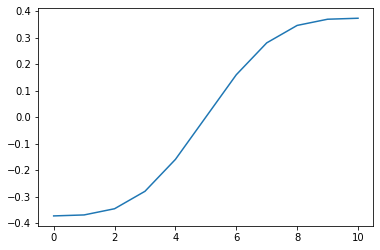

In [7]:
plt.plot(pca.components_[0])

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data) # Iris dataset projected along the first three PCA eigenvectors
ax.scatter(values[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")

In [10]:
values[0, :, 0]

array([ 1.59836739e-02,  1.58249334e-02,  1.48235231e-02,  1.20016985e-02,
        6.84572657e-03,  7.11317068e-18, -6.84572657e-03, -1.20016985e-02,
       -1.48235231e-02, -1.58249334e-02, -1.59836739e-02])

In [15]:
eval_tensor = np.array(np.meshgrid(*grid))
eval_tensor


(3, 11, 11, 11)